In [1]:

import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import uniform

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]

np.random.seed()

# Non-linearity used at the layers


*   Define the non-linearity for forward propagation
*   <font color='red'>Define the gradient of the non-linearities for backward propagation</font>



In [2]:
class differentiableQuadraticLayer:
    def __init__(self):
        self.x = None

    def forward(self,x):
        self.x = x
        return x**2
#        return np.tanh(x)

    def backward(self,dy):

        # YOUR CODE BELOW

        diff = 2*self.x

        # DELETING THE SAVED X
        self.x = None
        return np.multiply(dy,diff)



# Linear Layer


*   Define the forward propagation
*   <font color='red'>Define the gradient for backward propagation</font>


In [36]:
class differentiableLinearLayer:
    def __init__(self):
        self.w = np.random.rand(1)[0]*0.001
        self.b = 0
        self.wgrad = None
        self.bgrad = None
        self.x = None


    def forward(self,x):
        self.x = x
        return self.w*x + self.b


    def backward(self,dy):
        diff = self.w*dy

        # YOUR CODE BELOW
        self.wgrad = dy @ self.x.T
        self.bgrad = dy @ np.ones((dy.shape[0],1))

        self.x = diff

        return diff

## Define the losses and their derivatives


*   Define the loss functions for loss evaluation
*   <font color='red'> Define the gradient of the loss functions for backpropagation </font>



In [37]:
class differentiablemse:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self,x,y):
        err = np.power(x-y,2)
        cost = np.sum(err)
        self.x=x
        self.y=y
        return cost

    def backward(self):

        #YOUR CODE BELOW
        diff = 2*(self.x - self.y)
        self.x = None
        self.y = None
        return diff


### Network
#### <font color=red> MODIFY THE CODE BELOW </font>


In [46]:
class network:
    def __init__(self):

        self.layer = []
        self.layer.append(differentiableLinearLayer())
        self.layer.append(differentiableQuadraticLayer())

    def forward(self,x):
        # YOUR CODE BELOW
        #linear -> non-linear
        return self.layer[1].forward(self.layer[0].forward(x))

    def backward(self,dy):
        # YOUR CODE BELOW
        #non-linear -> linear
        return self.layer[0].backward(self.layer[1].backward(dy))

    def update(self, learning_rate):
        # YOUR CODE BELOW
        self.layer[0].w = self.layer[0].w - self.layer[0].wgrad * learning_rate
        self.layer[0].b = self.layer[0].b - self.layer[0].bgrad * learning_rate

        # Updating the parameters according to algorithm



## Steepest descent optimization scheme

In [47]:
def optimize(nn,x,y,loss,num_iterations,learning_rate):
    for i in range(0, num_iterations):

        # Forward propagation.
        ypred = nn.forward(x)

        # Cost function.
        d = loss.forward(ypred, y)

        # Backpropagation.
        diffLoss = loss.backward()
        nn.backward(diffLoss)
        nn.update(learning_rate)

        # Print the cost every 1000 iterations
        if i % 500 == 0:
            print ("Cost after iteration % i: % f" % (i, d))

# <font color=blue > Network training </font>

In [48]:
np.random.randn(1)[0]

0.8022119721836717

Cost after iteration  0:  2928.661197
Cost after iteration  500:  0.000000
Cost after iteration  1000:  0.000000
Cost after iteration  1500:  0.000000
Cost after iteration  2000:  0.000000
Cost after iteration  2500:  0.000000
Cost after iteration  3000:  0.000000
Cost after iteration  3500:  0.000000
Cost after iteration  4000:  0.000000
Cost after iteration  4500:  0.000000


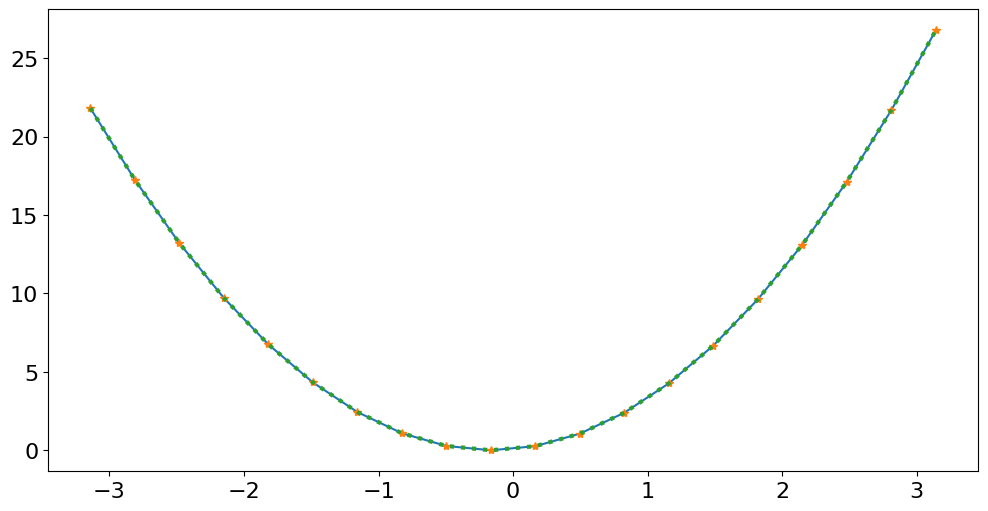

In [49]:
x = np.linspace(-np.pi,np.pi,20)
a = np.random.randn(1)[0]
b = np.random.randn(1)[0]

y = (a*x+b)**2
plt.plot(x,y)
plt.plot(x,y,'*')

nn = network()
loss = differentiablemse()

optimize(nn,x,y,loss,5000,.0001)
plt.plot(x,nn.forward(x),linestyle='dotted',linewidth=3)